In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [479]:
dollarrss=pd.read_csv(r"C:\Users\USER\Downloads\exchange_rate.csv", index_col="date",parse_dates=True) # importing the data and set the index as date

In [480]:
dollarrss

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [481]:
dollars["date"] = pd.to_datetime(dollars["date"], format="%d-%m-%Y %H:%M") #formating the date time data

In [482]:
dollars = dollars.set_index("date")

In [483]:
dollars

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


Data preprocessing

In [37]:
dollars.isnull().sum() #checking for null valuesd

Ex_rate    0
dtype: int64

In [38]:
dollarss=dollars["Ex_rate"]

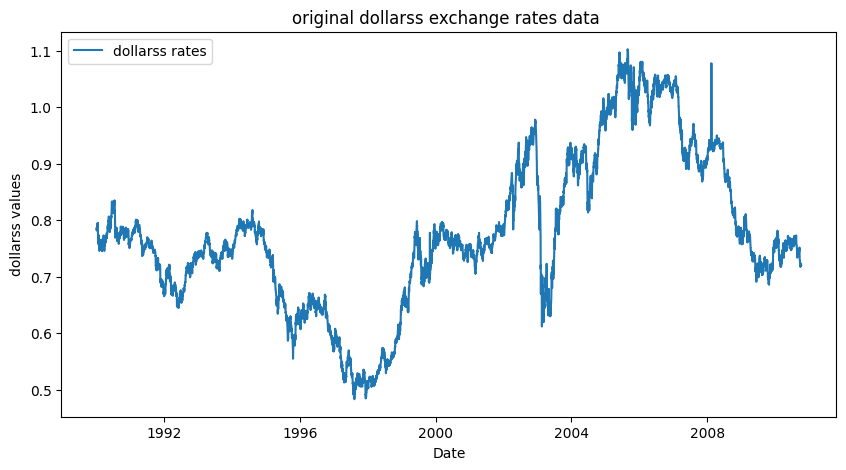

In [95]:
#to check the distribution of data over the times
plt.figure(figsize=(10,5))
plt.plot(dollarss,label="dollarss rates")
plt.title("original dollarss exchange rates data ")
plt.xlabel("Date")
plt.ylabel("dollarss values")
plt.legend()
plt.show()

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
#seasonal decomposition 
seasonals=seasonal_decompose(dollarss,model="additive",period=365)

In [46]:
#time series component strends seasonality and residuals
trends=seasonals.trend
seasonality=seasonals.seasonal
residuals=seasonals.resid

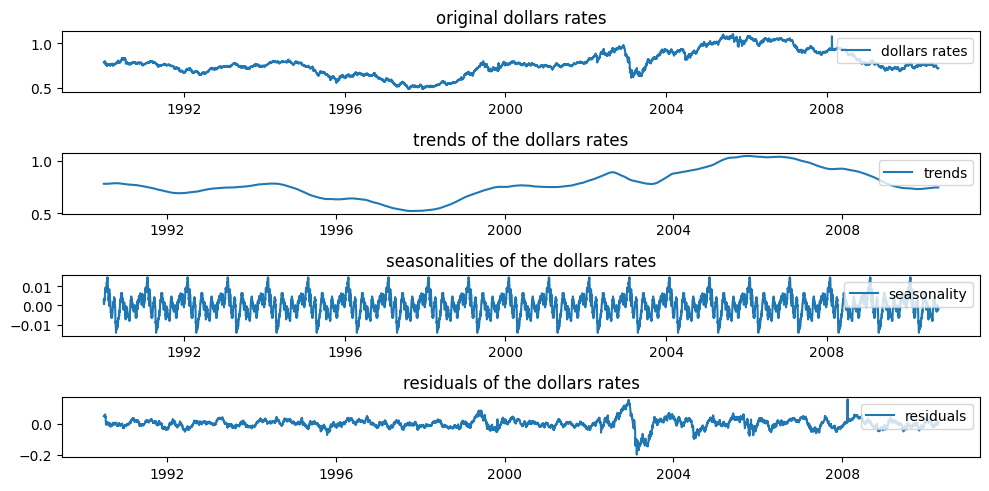

In [48]:
plt.figure(figsize=(10,6))
plt.subplot(511)
plt.plot(dollarss,label="dollars rates")
plt.title("original dollars rates")
plt.legend(loc="upper right")
plt.subplot(512)
plt.plot(trends,label="trends")
plt.title("trends of the dollars rates")
plt.legend(loc="upper right")
plt.subplot(513)
plt.plot(seasonality,label="seasonality")
plt.title("seasonalities of the dollars rates")
plt.legend(loc="upper right")
plt.subplot(514)
plt.plot(residuals,label="residuals")
plt.title("residuals of the dollars rates")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

checking for diagnostics

In [56]:
#diagnostics checkings
import statsmodels.api as st
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [58]:
residualss=dollars["Ex_rate"]-dollars["Ex_rate"].mean()

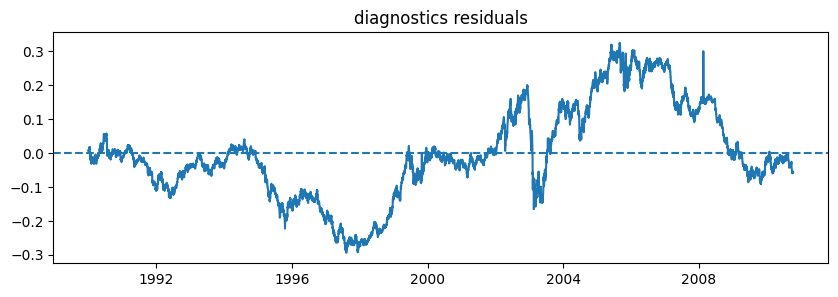

In [60]:
plt.figure(figsize=(10,3))
plt.plot(residualss,label="risiduals")
plt.axhline(0,linestyle="--")
plt.title("diagnostics residuals")
plt.show()

<Axes: xlabel='Ex_rate', ylabel='Count'>

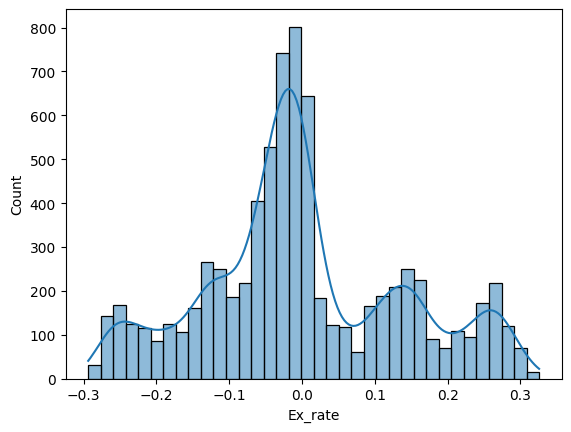

In [70]:
sns.histplot(residualss,kde=True,label="histplots")

<Figure size 1000x500 with 0 Axes>

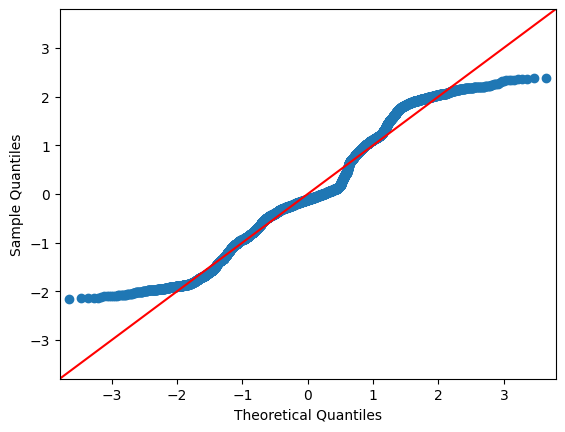

In [72]:
plt.figure(figsize=(10,5))
sm.qqplot(residualss,line="45",fit=True)
plt.show()

In [76]:
lb_plots=acorr_ljungbox(residualss,lags=[10,20,30],return_df=True)
lb_plots

,lb_stat,lb_pvalue
10,75296.508186,0.0
20,149565.549858,0.0
30,222848.123682,0.0


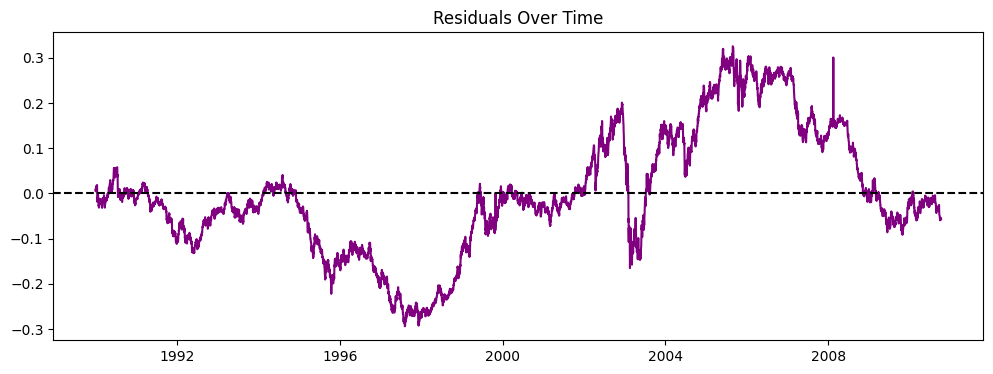

In [53]:
plt.figure(figsize=(12,4))
plt.plot(resid, color='purple')
plt.axhline( linestyle='--', color='black')
plt.title('Residuals Over Time')
plt.show()


Decomposition of data using stl deompositions

In [77]:
#stl decommposition to maintain the statistical components
from statsmodels.tsa.seasonal import STL

In [78]:
stlss=STL(dollarss,period=365)

In [79]:
sts=stlss.fit()

In [80]:
sts

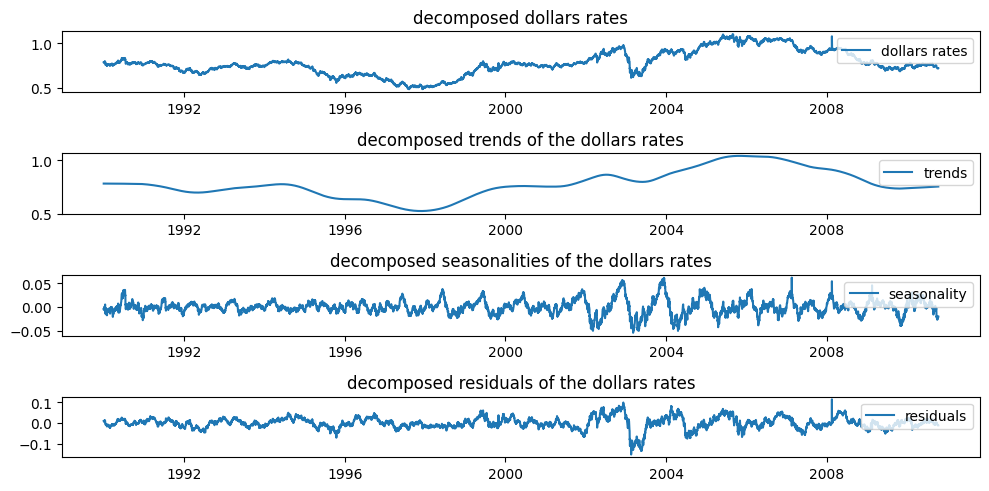

In [84]:
#trends seasonality and residuals after applying the stl decomposition methods
plt.figure(figsize=(10,6))
plt.subplot(511)
plt.plot(sts.observed,label="dollars rates")
plt.title("decomposed dollars rates")
plt.legend(loc="upper right")
plt.subplot(512)
plt.plot(sts.trend,label="trends")
plt.title("decomposed trends of the dollars rates")
plt.legend(loc="upper right")
plt.subplot(513)
plt.plot(sts.seasonal,label="seasonality")
plt.title("decomposed seasonalities of the dollars rates")
plt.legend(loc="upper right")
plt.subplot(514)
plt.plot(sts.resid,label="residuals")
plt.title("decomposed residuals of the dollars rates")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

to check the stationarity of the data

In [99]:
from statsmodels.tsa.stattools import adfuller

In [104]:
#adfuller is used to check the stationarit6y of the data
def adf_test(series):
    mov_avg=series.rolling(window=12).mean()
    mov_std=series.rolling(window=12).std()
    adfss=adfuller(series)
    print("statistics:",np.round(adfss[0],6))
    print("p_values:",np.round(adfss[1],6))
    print("lags:",np.round(adfss[2],6))
    print("observations",np.round(adfss[3],6))
    print("critical values")
    for keys,values in adfss[4].items():
        print("keys:",keys,"values:",values)
    if adfss[0]<values:
        print("reject null hypothesis data is stationary")
    else:
        print("accept null hypothesis data is non stationary")

In [105]:
adf_test(dollarss)

statistics: -1.664994
p_values: 0.449233
lags: 1
observations 7586
critical values
keys: 1% values: -3.4312123140180137
keys: 5% values: -2.861921078147796
keys: 10% values: -2.5669728434336108
accept null hypothesis data is non stationary


In [107]:
dollarss_cur=dollarss-dollarss.shift(12)

In [131]:
dollarss_currencies=dollarss_cur.dropna()

In [132]:
adf_test(dollarss_cur.dropna())

statistics: -10.56518
p_values: 0.0
lags: 36
observations 7539
critical values
keys: 1% values: -3.431217691730046
keys: 5% values: -2.8619234543463885
keys: 10% values: -2.5669741083162005
reject null hypothesis data is stationary


In [133]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 1000x500 with 0 Axes>

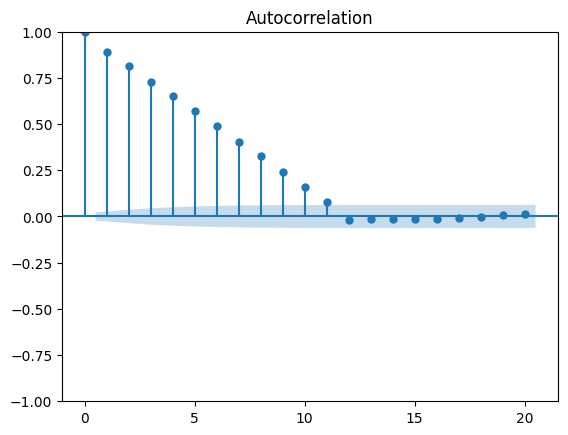

In [134]:
#autocorelation dunctions
plt.figure(figsize=(10,5))
plot_acf(dollarss_currencies,lags=20)
plt.show()

<Figure size 1000x600 with 0 Axes>

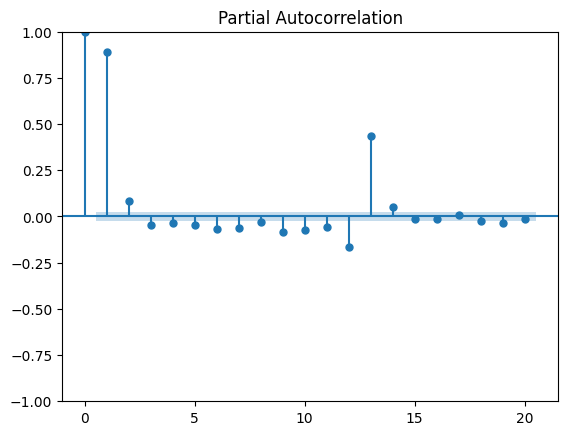

In [135]:
#partial autocorelations
plt.figure(figsize=(10,6))
plot_pacf(dollarss_currencies,lags=20)
plt.show()

In [161]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

auto regressive models

In [206]:
au_model=AutoReg(dollarrss["Ex_rate"],lags=365)

In [207]:
au_models=au_model.fit()

In [208]:
dollarrss["au_preds"]=au_models.predict()

In [220]:
dollaarrss=dollarrss["au_preds"].dropna()

In [221]:
dollaarrss

365     0.766081
366     0.766029
367     0.767582
368     0.766392
369     0.765193
          ...   
7583    0.717640
7584    0.718102
7585    0.723097
7586    0.722926
7587    0.720696
Name: au_preds, Length: 7223, dtype: float64

In [212]:
au_forecastings=au_models.forecast(365)

In [213]:
au_forecastings

7588    0.722851
7589    0.723049
7590    0.725056
7591    0.726115
7592    0.725118
          ...   
7948    0.736816
7949    0.737034
7950    0.736998
7951    0.736552
7952    0.736373
Length: 365, dtype: float64

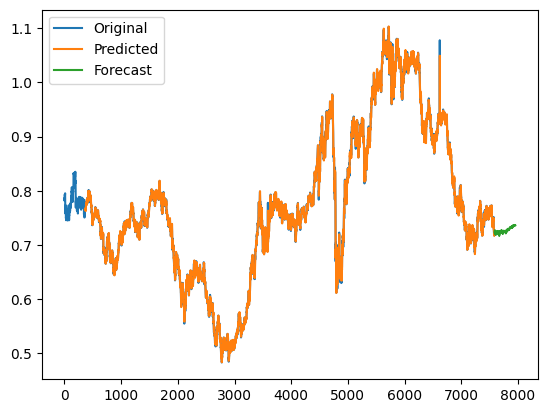

In [214]:
plt.plot(dollarrss["Ex_rate"],label='Original')
plt.plot(dollarrss["au_preds"],label='Predicted')
plt.plot(au_forecastings,label='Forecast')
plt.legend()

moving averages

In [240]:
modells=ARIMA(dollarrss["Ex_rate"],order=(0,0,2))

In [241]:
mas_modells=modells.fit()

In [242]:
dollarrss["predds"]=ars_models.predict()

In [243]:
dollarrss["predds"]

0       0.000000
1       0.785500
2       0.782286
3       0.786058
4       0.786135
          ...   
7583    0.718842
7584    0.718513
7585    0.721416
7586    0.723013
7587    0.721085
Name: predds, Length: 7588, dtype: float64

In [244]:
forecastings=ars_models.forecast(365)

In [245]:
forecastings

7588    0.720809
7589    0.720841
7590    0.720835
7591    0.720839
7592    0.720838
          ...   
7948    0.720839
7949    0.720839
7950    0.720839
7951    0.720839
7952    0.720839
Name: predicted_mean, Length: 365, dtype: float64

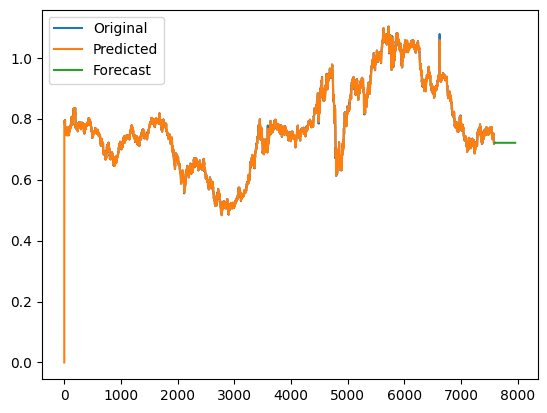

In [246]:
plt.plot(dollarrss["Ex_rate"],label='Original')
plt.plot(dollarrss["predds"],label='Predicted')
plt.plot(forecastings,label='Forecast')
plt.legend()

ARMA  autoregressive with moving averasges

In [247]:
models=ARIMA(dollarrss["Ex_rate"],order=(2,0,2))

In [252]:
armas_models=models.fit()

In [253]:
dollarrss["preddss"]=armas_models.predict()

In [254]:
dollarrss["preddss"]

0       0.776974
1       0.785492
2       0.782280
3       0.786054
4       0.786100
          ...   
7583    0.718892
7584    0.718563
7585    0.721458
7586    0.723053
7587    0.721160
Name: preddss, Length: 7588, dtype: float64

In [255]:
forecastingss=ars_models.forecast(365)

In [256]:
forecastingss

7588    0.720876
7589    0.720931
7590    0.720964
7591    0.721009
7592    0.721048
          ...   
7948    0.733894
7949    0.733926
7950    0.733957
7951    0.733989
7952    0.734020
Name: predicted_mean, Length: 365, dtype: float64

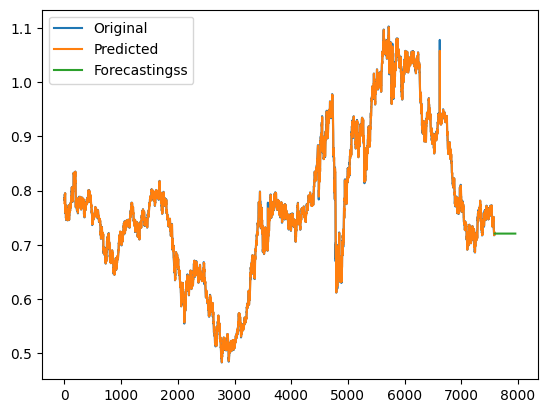

In [257]:
plt.plot(dollarrss["Ex_rate"],label='Original')
plt.plot(dollarrss["preddss"],label='Predicted')
plt.plot(forecastings,label='Forecastingss')
plt.legend()

ARIMA auto regressive integrsted moving aversges

In [458]:
models=ARIMA(dollarrss["Ex_rate"],order=(2,1,1))

In [459]:
arima_models=models.fit()

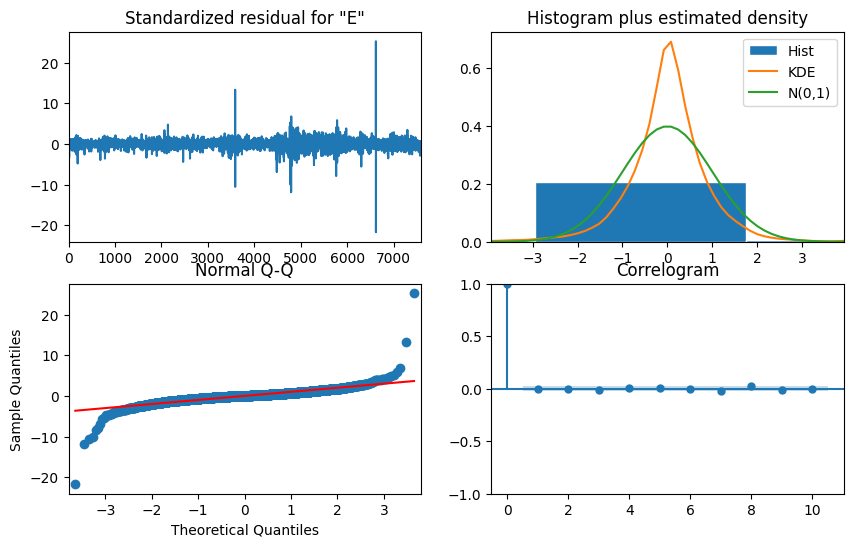

In [473]:
arima_models.plot_diagnostics(figsize=(10,6))
plt.show()

In [460]:
dollarrss["predictions"]=arima_models.predict()

In [461]:
dollarrss["predictions"]

0       0.000000
1       0.785500
2       0.782286
3       0.786057
4       0.786091
          ...   
7583    0.718837
7584    0.718522
7585    0.721399
7586    0.723017
7587    0.721136
Name: predictions, Length: 7588, dtype: float64

In [462]:
forecastings=ars_models.forecast(365)

In [463]:
forecastings

7588    0.720876
7589    0.720931
7590    0.720964
7591    0.721009
7592    0.721048
          ...   
7948    0.733894
7949    0.733926
7950    0.733957
7951    0.733989
7952    0.734020
Name: predicted_mean, Length: 365, dtype: float64

In [475]:
arima_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 1)   Log Likelihood               28054.157
Date:                Mon, 27 Oct 2025   AIC                         -56100.315
Time:                        13:14:35   BIC                         -56072.578
Sample:                             0   HQIC                        -56090.796
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0655      0.001    -60.736      0.000      -0.068      -0.063
ar.L2          0.0084      0.006      1.422      0.155      -0.003       0.020
ma.L1         -0.0661      0.001    -59.596      0.000      -0.068      -0.064
sigma2       3.59e-05   9.91e-08    362.247      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2864110.03
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.93e+17. Standard errors may be unstable.
"""

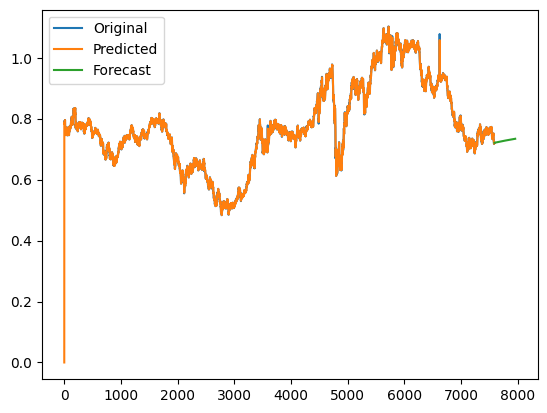

In [464]:
plt.plot(dollarrss["Ex_rate"],label='Original')
plt.plot(dollarrss["predictions"],label='Predicted')
plt.plot(forecastings,label='Forecast')
plt.legend()

In [465]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

performace matrices

In [467]:
np.sqrt(mean_squared_error(dollarrss["Ex_rate"],dollarrss["predictions"]))

np.float64(0.010828925893315786)

In [468]:
mean_absolute_error(dollarrss["Ex_rate"],dollarrss["predictions"])

0.00379593941829457

In [469]:
np.mean(np.abs((dollarrss["Ex_rate"]-dollarrss["predictions"])/dollarrss["Ex_rate"]*100))

np.float64(0.49514447392481326)

In [447]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [448]:
exp_smooths=ExponentialSmoothing(dollarrss["Ex_rate"],trend="add",seasonal="mul",seasonal_periods=365)
exp_models=exp_smooths.fit(smoothing_level=0.3)
dollarrss["EXP"]=exp_models.fittedvalues

In [449]:
dollarrss["EXP"]

0       0.785906
1       0.786612
2       0.782322
3       0.784697
4       0.785524
          ...   
7583    0.719002
7584    0.718392
7585    0.717563
7586    0.719076
7587    0.718308
Name: EXP, Length: 7588, dtype: float64

In [450]:
forecastes=exp_models.forecast(365)

In [451]:
forecastes

7588    0.719008
7589    0.714550
7590    0.713389
7591    0.712781
7592    0.714027
          ...   
7948    0.516304
7949    0.515895
7950    0.514457
7951    0.514194
7952    0.513124
Length: 365, dtype: float64

In [476]:
exp_models.summary()

Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.421
Optimized:,True,AIC,-73612.612
Trend:,Additive,BIC,-71053.846
Seasonal:,Multiplicative,AICC,-73574.360
Seasonal Periods:,365,Date:,"Mon, 27 Oct 2025"
Box-Cox:,False,Time:,13:17:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3000000,alpha,False
smoothing_trend,0.0271241,beta,True


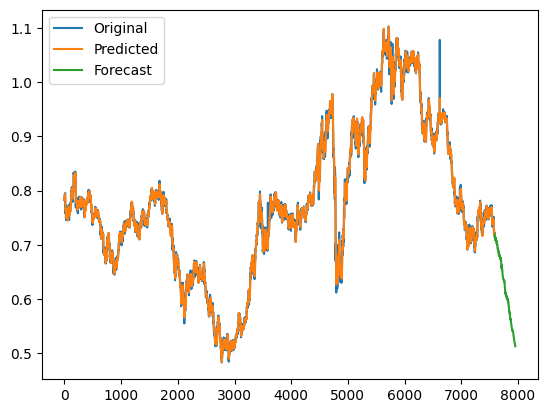

In [452]:
plt.plot(dollarrss["Ex_rate"],label='Original')
plt.plot(dollarrss["EXP"],label='Predicted')
plt.plot(forecastes,label='Forecast')
plt.legend()

performance matrixes

In [454]:
np.sqrt(mean_squared_error(dollarrss["Ex_rate"],dollarrss["EXP"]))

np.float64(0.0074523696992783205)

In [455]:
mean_absolute_error(dollarrss["Ex_rate"],dollarrss["EXP"])

0.005204229748446002

In [456]:
np.mean(np.abs((dollarrss["Ex_rate"],dollarrss["EXP"])))

np.float64(0.7769731523419948)

Models Comparisions

1. RMSE (Root Mean Squared Error)
Here, Exponential Smoothing shows RMSE = 0.001 which looks smaller than ARIMA’s 0.01,
BUT — this can sometimes happen if the forecasted values are smoother or have smaller variation.
It doesn’t always mean the model is truly more accurate — it might be over-smoothed.

2. MAE (Mean Absolute Error)
ARIMA’s MAE = 0.03 < 0.05,
meaning on average, ARIMA’s predictions are numerically closer to actual data.

3. MAPE (Mean Absolute Percentage Error)
ARIMA’s MAPE = 0.47% < 0.77%,
so ARIMA’s percentage error is smaller — it’s more consistent relative to actual values.

compare to arima and sarima  the exponential smoothing is not able to maintain and predict  the long term data and large datasets and it is only for the rescent trends and small datasets but arima and sarima are capable to predict the longsequence of data and even more accurate in performance and predictions.so compared to exponential smoothing Arima and Sarima is better 